In [ ]:
# colab에서 한글이 깨질때 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,696 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

# EDA 목표
*   유니콘 기업 분류 및 예비 유니콘 기업 분류
*   데이터 관계를 통해 가설 설립





In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
company_df = pd.read_csv('/content/MyDrive/MyDrive/company_nps_data.csv', encoding="cp949")

In [4]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

In [5]:
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [6]:
company_df['년도'].sort_values()

50120    2015
61242    2015
61226    2015
39082    2015
90227    2015
         ... 
75986    2019
17795    2019
78226    2019
20316    2019
7408     2019
Name: 년도, Length: 99801, dtype: int64

In [7]:
print(company_df.shape) # 데이터의 행, 열 개수 출력
print(company_df.dtypes) # 데이터의 타입 출력

(99801, 6)
회사ID        int64
연매출액        int64
년도          int64
월           int64
월별_연금보험료    int64
월별_직원수      int64
dtype: object


In [8]:
company_df[company_df.duplicated(keep=False)] # 중복된 열 출력 --> 없음

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수


In [9]:
company_df.isna().sum() # 컬럼별 NaN값 출력 --> NaN값 없음

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

In [10]:
company_df.describe() # 컬럼별 요약 통계 지표 출력

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


In [11]:
company_df.corr() # 회사 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,1.000000,-0.001675,-0.033194,0.008969,-0.010393,0.007430
연매출액,-0.001675,1.000000,0.015202,-0.001347,0.729694,0.638125
년도,-0.033194,0.015202,1.000000,-0.096107,0.008121,-0.002206
월,0.008969,-0.001347,-0.096107,1.000000,0.005006,0.002000
월별_연금보험료,-0.010393,0.729694,0.008121,0.005006,1.000000,0.962101
월별_직원수,0.007430,0.638125,-0.002206,0.002000,0.962101,1.000000


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


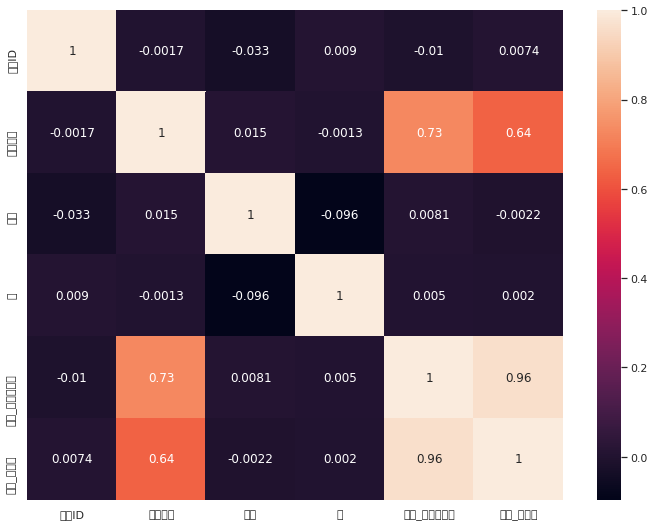

In [12]:
sns.heatmap(company_df.corr(), annot=True)
# 연매출액과 연금보험료, 월별 직원수 상관관계임

#개인적인 전처리 방향


1. 연매출액이 1조 이상 유니콘기업과 1000억이상 예비유니콘분류
2. 3년 평균 20%이상 성장율인 기업 분류
3. 직원수 기준을 통해 분류

#팀 전처리 회의 결과

1.   직원수 0 제외
2.   연매출액 1000억 이상(1000억이상이면 마이너스가 안될꺼 같음)
3.   3년이상 기업
4.   보험료, 직원수, 연매출 증가율 칼럼 추가









In [13]:
company_df['년월'] = pd.to_datetime(company_df['년도'].astype(str) + company_df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

In [14]:
company_df = company_df.drop(index=company_df.query('월별_직원수 == 0').index) # 직원수 0명 제외
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
2,342124,3221341,2018,7,781180,4,201807
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,201702
99797,239388,1045021,2018,10,1428800,9,201810
99798,272304,181898,2018,3,392560,4,201803
99799,362194,2100218,2018,12,874780,3,201812


In [15]:
company_df = company_df.groupby('회사ID').filter(lambda x: len(x)>=36) # 3년이상 된 기업
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810
7,189562,7119908,2016,1,1276900,6,201601
...,...,...,...,...,...,...,...
99791,442613,1513092,2017,3,3457380,20,201703
99793,199954,1651504,2016,1,1414960,6,201601
99795,150135,7119441,2016,12,4872520,25,201612
99796,171439,4630622,2017,2,2402740,11,201702


In [16]:
company_df['회사ID'].value_counts()

134575    50
250472    50
14271     50
128174    50
442467    50
          ..
187137    36
307820    36
469567    36
332709    36
210711    36
Name: 회사ID, Length: 1127, dtype: int64

In [17]:
company_df.isna().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
년월          0
dtype: int64

In [18]:
company_df = company_df[company_df['연매출액']>100000000] # 1000억이상 기업 기준점을 회의에서 확실히 안잡아서 처음 생각한 방향으로 기준을 잡은 상황
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
55,231080,152393780,2018,7,51609300,160,201807
65,231080,132542490,2017,8,42458520,144,201708
127,130322,201421946,2018,7,31335400,107,201807
135,232757,294131018,2018,2,7610780,40,201802
162,127060,287298836,2018,4,127501260,396,201804
...,...,...,...,...,...,...,...
99635,126538,671580655,2016,10,380370640,1214,201610
99724,294387,150451803,2017,9,161888520,768,201709
99757,128174,106106973,2017,2,51496520,192,201702
99760,420046,488179570,2017,7,121248540,398,201707


In [19]:
a_df = company_df['회사ID'].unique() # 76개의 회사 검출
print(company_df['회사ID'].value_counts())
a_df.sort()
a_df

419945    48
403359    38
294387    38
126983    38
403462    38
          ..
128485    12
420165    12
231606    12
403470    12
296476     2
Name: 회사ID, Length: 76, dtype: int64


array([126521, 126538, 126606, 126664, 126674, 126772, 126802, 126814,
       126831, 126983, 127060, 127065, 127090, 127180, 127202, 127366,
       127511, 127669, 128174, 128440, 128485, 128539, 128638, 128896,
       129828, 130322, 130386, 130387, 130577, 130729, 133951, 146654,
       154500, 227414, 227415, 231080, 231173, 231384, 231606, 231703,
       232757, 234236, 294337, 294367, 294387, 294530, 294620, 294649,
       294790, 295618, 296476, 297327, 297874, 301484, 381180, 381344,
       382850, 403351, 403359, 403434, 403462, 403470, 403504, 419945,
       419977, 419998, 420008, 420046, 420076, 420082, 420165, 426429,
       428817, 430504, 469677, 510329])

In [24]:
# 회사 id별로 연매출액 증가율 계산 
sorted_df = company_df.sort_values(by=['회사ID','년도','월','년월'], axis=0)
sorted_df.reset_index(drop=True, inplace=True)
sales_rate = sorted_df.drop_duplicates(['연매출액'], keep = 'first')
sales_rate['연매출액_증가율(%)'] = 0
for i in range(1, len(sales_rate)):
  sales_rate['연매출액_증가율(%)'].iloc[i] = round((sales_rate['연매출액'].iloc[i]-sales_rate['연매출액'].iloc[i-1])/sales_rate['연매출액'].iloc[i-1]*100, 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i

In [25]:
sales_rate

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,연매출액_증가율(%)
0,126521,567910907,2015,11,525409000,1588,201511,0.0000
2,126521,560278128,2016,1,514146080,1559,201601,-1.3440
14,126521,554767229,2017,1,540452660,1574,201701,-0.9836
26,126521,567246558,2018,1,537912360,1493,201801,2.2495
38,126538,605381377,2015,11,346524780,1156,201511,6.7228
...,...,...,...,...,...,...,...,...
2468,469677,108023614,2018,1,109841900,530,201801,0.6956
2480,510329,149770456,2015,11,134613720,599,201511,38.6460
2482,510329,136264259,2016,1,132496400,584,201601,-9.0179
2494,510329,134718002,2017,1,129854800,586,201701,-1.1347


# 문제점 발생
index2468 / 2480 처럼 다른 회사인데 증가율 계산에 영향을 주는 문제발생

아래 worker_rate도 같은 문제발생

##해결방법

groupby를 사용하면 될꺼 같은데 생각이 나지 않아서 일단 보류


In [26]:
mz = sales_rate[sales_rate['회사ID']==127060]
mz

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,연매출액_증가율(%)
366,127060,298961204,2015,11,111902580,390,201511,52.8664
368,127060,299199052,2016,1,111901940,393,201601,0.0796
380,127060,315435868,2017,1,119151440,392,201701,5.4268
392,127060,287298836,2018,1,129556720,399,201801,-8.9200


In [27]:
# 회사 id별로 직원수 증가율 계산 
df_sorted = company_df.sort_values(by=['회사ID','년도','월'], axis=0)
df_sorted.reset_index(drop=True, inplace=True)
worker_rate = df_sorted.drop_duplicates(['월별_직원수'], keep = 'first')
worker_rate['직원수_증가율(%)'] = 0
for i in range(1, len(worker_rate)):
  worker_rate['직원수_증가율(%)'].iloc[i] = round((worker_rate['월별_직원수'].iloc[i]-worker_rate['월별_직원수'].iloc[i-1])/worker_rate['월별_직원수'].iloc[i-1]*100, 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i

In [28]:
worker_rate

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,직원수_증가율(%)
0,126521,567910907,2015,11,525409000,1588,201511,0.0000
1,126521,567910907,2015,12,503888480,1520,201512,-4.2821
2,126521,560278128,2016,1,514146080,1559,201601,2.5658
3,126521,560278128,2016,2,520103520,1583,201602,1.5394
4,126521,560278128,2016,3,519897880,1581,201603,-0.1263
...,...,...,...,...,...,...,...,...
2501,510329,134718002,2017,8,139135000,597,201708,0.3361
2503,510329,134718002,2017,10,138579000,602,201710,0.8375
2507,510329,143513683,2018,2,124604200,546,201802,-9.3023
2508,510329,143513683,2018,3,122216920,533,201803,-2.3810


In [29]:
mq = worker_rate[worker_rate['회사ID']==127060]
mq

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,직원수_증가율(%)
366,127060,298961204,2015,11,111902580,390,201511,-25.8555
369,127060,299199052,2016,2,112337100,396,201602,1.5385
370,127060,299199052,2016,3,111204900,392,201603,-1.0101
372,127060,299199052,2016,5,109880640,387,201605,-1.2755
373,127060,299199052,2016,6,109442880,385,201606,-0.5168
374,127060,299199052,2016,7,117999860,381,201607,-1.0390
376,127060,299199052,2016,9,119242380,388,201609,1.8373
377,127060,299199052,2016,10,119404960,391,201610,0.7732
381,127060,315435868,2017,2,119857040,395,201702,1.0230
385,127060,315435868,2017,6,120002860,397,201706,0.5063


In [30]:
com = sales_rate.combine_first(worker_rate) # object1에 누락값이 존재할 경우 동일위치에 존재하는 object2의 값을 채워넣음
com

,년도,년월,연매출액,연매출액_증가율(%),월,월별_연금보험료,월별_직원수,직원수_증가율(%),회사ID
0,2015.0,201511,567910907.0,0.000,11.0,525409000.0,1588.0,0.0000,126521.0
1,2015.0,201512,567910907.0,NaN,12.0,503888480.0,1520.0,-4.2821,126521.0
2,2016.0,201601,560278128.0,-1.344,1.0,514146080.0,1559.0,2.5658,126521.0
3,2016.0,201602,560278128.0,NaN,2.0,520103520.0,1583.0,1.5394,126521.0
4,2016.0,201603,560278128.0,NaN,3.0,519897880.0,1581.0,-0.1263,126521.0
...,...,...,...,...,...,...,...,...,...
2503,2017.0,201710,134718002.0,NaN,10.0,138579000.0,602.0,0.8375,510329.0
2506,2018.0,201801,143513683.0,6.529,1.0,135787480.0,590.0,NaN,510329.0
2507,2018.0,201802,143513683.0,NaN,2.0,124604200.0,546.0,-9.3023,510329.0
2508,2018.0,201803,143513683.0,NaN,3.0,122216920.0,533.0,-2.3810,510329.0


In [31]:
com.isna().sum()

년도               0
년월               0
연매출액             0
연매출액_증가율(%)    849
월                0
월별_연금보험료         0
월별_직원수           0
직원수_증가율(%)     132
회사ID             0
dtype: int64

In [32]:
com = com[['회사ID', '년월', '연매출액', '월별_연금보험료', '월별_직원수', '연매출액_증가율(%)', '직원수_증가율(%)','년도','월']]
com

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),년도,월
0,126521.0,201511,567910907.0,525409000.0,1588.0,0.000,0.0000,2015.0,11.0
1,126521.0,201512,567910907.0,503888480.0,1520.0,NaN,-4.2821,2015.0,12.0
2,126521.0,201601,560278128.0,514146080.0,1559.0,-1.344,2.5658,2016.0,1.0
3,126521.0,201602,560278128.0,520103520.0,1583.0,NaN,1.5394,2016.0,2.0
4,126521.0,201603,560278128.0,519897880.0,1581.0,NaN,-0.1263,2016.0,3.0
...,...,...,...,...,...,...,...,...,...
2503,510329.0,201710,134718002.0,138579000.0,602.0,NaN,0.8375,2017.0,10.0
2506,510329.0,201801,143513683.0,135787480.0,590.0,6.529,NaN,2018.0,1.0
2507,510329.0,201802,143513683.0,124604200.0,546.0,NaN,-9.3023,2018.0,2.0
2508,510329.0,201803,143513683.0,122216920.0,533.0,NaN,-2.3810,2018.0,3.0


In [33]:
com = com.fillna(method='pad') # 연매출액이기 때문에 1년동안 값은 고정 # 더욱 세세하게 전처리하기 위해선 월별 매출액을 만들어야함
com

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),년도,월
0,126521.0,201511,567910907.0,525409000.0,1588.0,0.0000,0.0000,2015.0,11.0
1,126521.0,201512,567910907.0,503888480.0,1520.0,0.0000,-4.2821,2015.0,12.0
2,126521.0,201601,560278128.0,514146080.0,1559.0,-1.3440,2.5658,2016.0,1.0
3,126521.0,201602,560278128.0,520103520.0,1583.0,-1.3440,1.5394,2016.0,2.0
4,126521.0,201603,560278128.0,519897880.0,1581.0,-1.3440,-0.1263,2016.0,3.0
...,...,...,...,...,...,...,...,...,...
2503,510329.0,201710,134718002.0,138579000.0,602.0,-1.1347,0.8375,2017.0,10.0
2506,510329.0,201801,143513683.0,135787480.0,590.0,6.5290,0.8375,2018.0,1.0
2507,510329.0,201802,143513683.0,124604200.0,546.0,6.5290,-9.3023,2018.0,2.0
2508,510329.0,201803,143513683.0,122216920.0,533.0,6.5290,-2.3810,2018.0,3.0


In [34]:
com.isna().sum()

회사ID           0
년월             0
연매출액           0
월별_연금보험료       0
월별_직원수         0
연매출액_증가율(%)    0
직원수_증가율(%)     0
년도             0
월              0
dtype: int64

In [35]:
cols = ['년도', '월']
com.drop(cols, axis=1, inplace=True)
com

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%)
0,126521.0,201511,567910907.0,525409000.0,1588.0,0.0000,0.0000
1,126521.0,201512,567910907.0,503888480.0,1520.0,0.0000,-4.2821
2,126521.0,201601,560278128.0,514146080.0,1559.0,-1.3440,2.5658
3,126521.0,201602,560278128.0,520103520.0,1583.0,-1.3440,1.5394
4,126521.0,201603,560278128.0,519897880.0,1581.0,-1.3440,-0.1263
...,...,...,...,...,...,...,...
2503,510329.0,201710,134718002.0,138579000.0,602.0,-1.1347,0.8375
2506,510329.0,201801,143513683.0,135787480.0,590.0,6.5290,0.8375
2507,510329.0,201802,143513683.0,124604200.0,546.0,6.5290,-9.3023
2508,510329.0,201803,143513683.0,122216920.0,533.0,6.5290,-2.3810


In [36]:
com_list= com['회사ID'].unique()
com_list

array([126521., 126538., 126606., 126664., 126674., 126772., 126802.,
       126814., 126831., 126983., 127060., 127065., 127090., 127180.,
       127202., 127366., 127511., 127669., 128174., 128440., 128485.,
       128539., 128638., 128896., 129828., 130322., 130386., 130387.,
       130577., 130729., 133951., 146654., 154500., 227414., 227415.,
       231080., 231173., 231384., 231606., 231703., 232757., 234236.,
       294337., 294367., 294387., 294530., 294620., 294649., 294790.,
       295618., 296476., 297327., 297874., 301484., 381180., 381344.,
       382850., 403351., 403359., 403434., 403462., 403470., 403504.,
       419945., 419977., 419998., 420008., 420046., 420076., 420082.,
       420165., 426429., 428817., 430504., 469677., 510329.])

In [37]:
xw = com[com['회사ID']==126521]
xw

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%)
0,126521.0,201511,567910907.0,525409000.0,1588.0,0.0000,0.0000
1,126521.0,201512,567910907.0,503888480.0,1520.0,0.0000,-4.2821
2,126521.0,201601,560278128.0,514146080.0,1559.0,-1.3440,2.5658
3,126521.0,201602,560278128.0,520103520.0,1583.0,-1.3440,1.5394
4,126521.0,201603,560278128.0,519897880.0,1581.0,-1.3440,-0.1263
5,126521.0,201604,560278128.0,519107020.0,1579.0,-1.3440,-0.1265
6,126521.0,201605,560278128.0,515996520.0,1569.0,-1.3440,-0.6333
7,126521.0,201606,560278128.0,513585900.0,1562.0,-1.3440,-0.4461
8,126521.0,201607,560278128.0,546483440.0,1601.0,-1.3440,2.4968
9,126521.0,201608,560278128.0,554419660.0,1621.0,-1.3440,1.2492


In [38]:
mq = com[com['회사ID']==126983]  # 처음 행에서 크게 나오는 이유가 다른 회사의 마지막 값과 비교해서 나오는것 같음 수정해야할 필요있음
mq

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%)
328,126983.0,201511,119119899.0,107683800.0,438.0,-94.6005,-25.2560
329,126983.0,201512,119119899.0,102787120.0,416.0,-94.6005,-5.0228
330,126983.0,201601,144618199.0,109435700.0,456.0,21.4056,9.6154
331,126983.0,201602,144618199.0,110214300.0,458.0,21.4056,0.4386
333,126983.0,201604,144618199.0,103712860.0,429.0,21.4056,-6.3319
334,126983.0,201605,144618199.0,100407920.0,413.0,21.4056,-3.7296
335,126983.0,201606,144618199.0,96290240.0,393.0,21.4056,-4.8426
336,126983.0,201607,144618199.0,104428100.0,409.0,21.4056,4.0712
337,126983.0,201608,144618199.0,106505600.0,419.0,21.4056,2.4450
338,126983.0,201609,144618199.0,110179240.0,436.0,21.4056,4.0573


In [39]:
com_list = sum(com['연매출액_증가율(%)']) > 20  # True가 발생하는 이유가 다른회사 매출액에 영향을 주는 것 같음
print(com_list)

True


문제점을 해결한 후 매출액 증가율의 평균값이 20프로~30프로 이상으로 필터링

그 이후 시각화를 통해 부족한 부분 도출할 것

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text

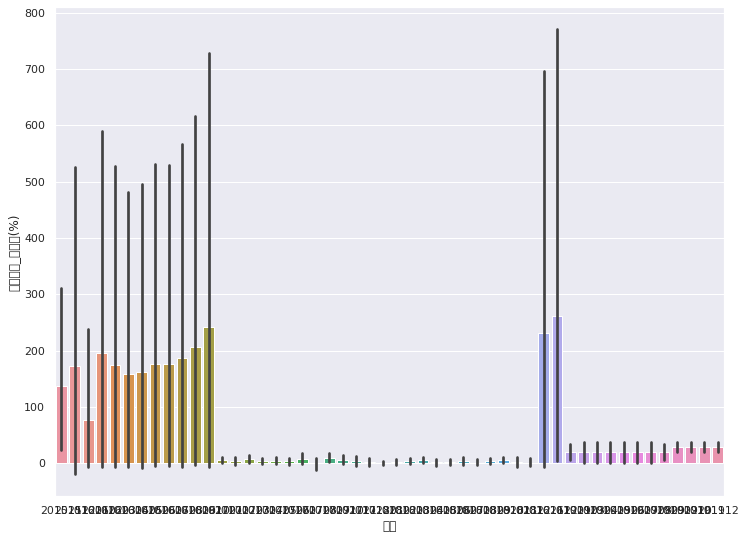

In [43]:
sns.barplot(data = com,
                x = "년월",
                y = "연매출액_증가율(%)")
# 그래프에서 +- 0~50% 사이 값에 집중되어 있음